Exception in thread Thread-26:
Traceback (most recent call last):
  File "C:\Users\lukas\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\lukas\anaconda3\lib\threading.py", line 870, in run


<IPython.core.display.Javascript object>

    self._target(*self._args, **self._kwargs)
  File "<ipython-input-20-6e63ed198dab>", line 27, in run



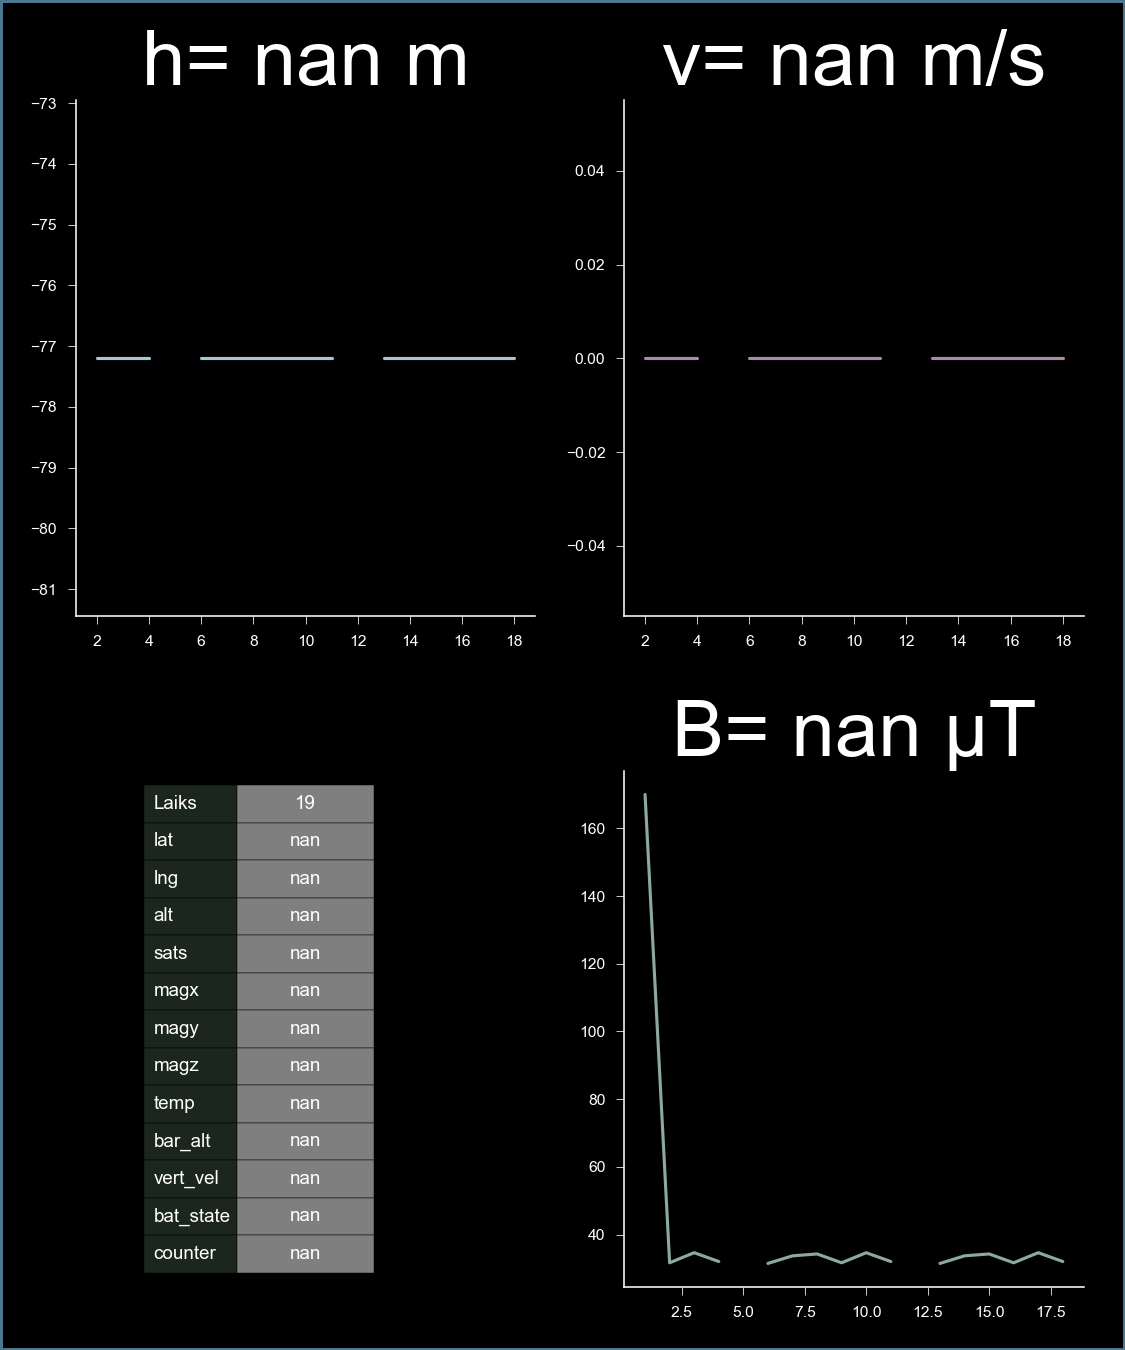

  File "C:\Users\lukas\anaconda3\lib\site-packages\serial\serialwin32.py", line 33, in __init__
    super(Serial, self).__init__(*args, **kwargs)
  File "C:\Users\lukas\anaconda3\lib\site-packages\serial\serialutil.py", line 244, in __init__
    self.open()
  File "C:\Users\lukas\anaconda3\lib\site-packages\serial\serialwin32.py", line 64, in open
    raise SerialException("could not open port {!r}: {!r}".format(self.portstr, ctypes.WinError()))
serial.serialutil.SerialException: could not open port 'COM16': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)


In [20]:
%matplotlib notebook
import serial
import csv
from threading import Thread
#PLOTOŠANAI
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
from itertools import count

path_to_csv = 'C:/Users/lukas/Documents/fc.csv' #path to writeable csv file

###-------Start Separate Thread-------###

class SerialReadThread:
    def __init__(self):
        self._running = True

    def terminate(self):
        self._running = False

    #Everything in this function runs as a separate thread
    def run(self):
        arduino_port = "COM16" #o uno runs at 9600 baud
        ser = serial.Serial(arduino_port, 115200)
        ser.flushInput()
        print("Connected to Arduino port:" + arduino_port)
        file = open(path_to_csv, "w")
        print("Created file")
        samples = 100000000 #how many samples to collect
        line = 0 #start at 0 because our header is 0 (not real data)
        with open(path_to_csv, "a", newline='') as csvfile:
            writer = csv.writer(csvfile,delimiter=",")
            writer.writerow("time,lat,long,alt,sats,magx,magy,magz,temp,bar_alt,vert_vel,bat_state,counter".split(sep=","))
            line = line +1

        while self._running and line <= samples:
            getData=ser.readline()
            data = str(getData[0:len(getData)-2].decode("utf-8"))
            data = str(line) + "," + data
            print(data)
            data_list = data.split(sep=",")
            with open(path_to_csv, "a", newline='') as csvfile:
                writer = csv.writer(csvfile,delimiter=",")
                writer.writerow(data_list)
                line = line + 1
        print("Data collection complete!")
        file.close()

#instantiate SerialReadThread object
SerialRead = SerialReadThread()
#Create Thread
SerThread = Thread(target=SerialRead.run)
#Start Thread
SerThread.start()



###-------Plotting-------###

plt.style.use('seaborn')
plt.style.use('dark_background')

#mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 0.5


fig, ([augstums, atrums], [tt, mag]) = plt.subplots(nrows=2, ncols=2, figsize=(10,12), linewidth=2, edgecolor="#4d7791")

def animate(i):
    
    data = pd.read_csv(path_to_csv)
    a = data['time']
    b = data['lat']
    c = data['long']
    d = data['alt']
    e = data['sats']
    f = data['magx']
    g = data['magy']
    h = data['magz']
    i = data['temp']
    k = data['bar_alt']
    l = data['vert_vel']
    m = data['bat_state']
    n = data['counter']


    aa=pd.DataFrame(data=a)
    bb=pd.DataFrame(data=b)
    cc=pd.DataFrame(data=c)
    dd=pd.DataFrame(data=d)
    ee=pd.DataFrame(data=e)
    ff=pd.DataFrame(data=f)
    gg=pd.DataFrame(data=g)
    hh=pd.DataFrame(data=h)
    ii=pd.DataFrame(data=i)
    kk=pd.DataFrame(data=k)
    ll=pd.DataFrame(data=l)
    mm=pd.DataFrame(data=m)
    nn=pd.DataFrame(data=n)



    aaa = ("%.0f" % (aa['time'].iloc[-1]))
    bbb = ("%.4f" % (bb['lat'].iloc[-1]))
    ccc = ("%.4f" % (cc['long'].iloc[-1]))
    ddd = ("%.1f" % (dd['alt'].iloc[-1]))
    eee = ("%.1f" % (ee['sats'].iloc[-1]))
    fff = ("%.1f" % (ff['magx'].iloc[-1]))
    ggg = ("%.1f" % (gg['magy'].iloc[-1]))
    hhh = ("%.1f" % (hh['magz'].iloc[-1]))
    iii = ("%.1f" % (ii['temp'].iloc[-1]))
    kkk = ("%.1f" % (kk['bar_alt'].iloc[-1]))
    lll = ("%.1f" % (ll['vert_vel'].iloc[-1]))
    mmm = ("%.1f" % (mm['bat_state'].iloc[-1]))
    nnn = ("%.0f" % (nn['counter'].iloc[-1]))


    atrums.cla()
    augstums.cla()
    mag.cla()

    plt.tight_layout()
    augstums.plot(a, k, color='#a5c6d4', linewidth=2)
    augstums.set_title('h= ' + str(kkk) + ' m', fontsize=50)
    augstums.grid(False)

    plt.tight_layout()
    atrums.plot(a, l, color='#a88ca7', linewidth=2) 
    atrums.set_title('v= ' + str(lll) + ' m/s', fontsize=50)
    atrums.grid(False)
    
    plt.tight_layout()
    mag.plot(a, g, color='#8ca8a5', linewidth=2) 
    mag.set_title('B= ' + str(ggg) + ' μT', fontsize=50)
    mag.grid(False)
    
    plt.subplots_adjust(hspace=0.3)




    #TABULA
    data = [[aaa],[bbb],[ccc],[ddd],[eee],[fff],[ggg],[hhh],[iii],[kkk],[lll],[mmm],[nnn]]
    rows = ('Laiks', 'lat', 'lng', 'alt', 'sats', 'magx','magy','magz','temp','bar_alt','vert_vel','bat_state','counter')
    cell_colors = [['tab:grey'],  ['tab:grey'], ['tab:grey'], ['tab:grey'],['tab:grey'], ['tab:grey'], ['tab:grey'],
                   ['tab:grey'], ['tab:grey'], ['tab:grey'], ['tab:grey'], ['tab:grey'], ['tab:grey']]

    tt.set_axis_off()
    table = tt.table(
        cellText = data,
        rowLabels = rows,
        rowColours =["#1b261e"] * 13,
        cellColours = cell_colors,
        cellLoc ='center',
        colWidths = [0.15, 0.25],
        loc ='center')

    table.set_fontsize(12)
    table.set_fontsize(12)
    table.scale(2, 2)
    
ani = FuncAnimation(plt.gcf(), animate, interval=1000)